In [14]:
import tweepy
from econfig import *
import datetime as dt
import json


In [15]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

try:
    api.verify_credentials()
    print("Authentication Complete")
except:
    print("Authentication Unable to Complete")
    
two_days = (dt.datetime.now() - dt.timedelta(days=3)).strftime("%Y-%m-%d")
one_day = (dt.datetime.now() - dt.timedelta(days=2)).strftime("%Y-%m-%d")

# startDate = datetime.datetime(2014, 6, 1, 0, 0, 0)
# endDate =   datetime.datetime(2015, 1, 1, 0, 0, 0)
MAX_TWEETS = 5
tweets = tweepy.Cursor(api.search, q='#election2020', rpp=100, since=two_days, until=one_day).items(MAX_TWEETS)


Authentication Complete


In [20]:
id_list = []
username = []
followers_count = []
date_created = []
tweet_text = []
for tweet in tweets:
#     print(json.dumps(tweet.__json))
    followers = tweet.user.followers_count
    followers_count.append(followers)
    id = tweet.id
    id_list.append(id)
    sn = tweet.user.screen_name
    username.append(sn)
    date = tweet.created_at.strftime('%Y-%m-%d %H:%M:%S')
    date_created.append(date)
    text = tweet.text
    tweet_text.append(text)
    cursor.execute("INSERT INTO new_tweets (date, id, username, follower_count, text)\
        VALUES (%s, %s, %s, %s, %s);", date, id, sn, followers, text)
    pass


In [35]:
print(json.dumps(tweet._json,indent=4))

{
    "created_at": "Thu Feb 27 23:59:45 +0000 2020",
    "id": 1233179948875210754,
    "id_str": "1233179948875210754",
    "text": "RT @LauraGreanias: We asked all 67 #Florida #elections supervisors how they're protecting against #hacking. Got mostly crickets. Then @jeff\u2026",
    "truncated": false,
    "entities": {
        "hashtags": [
            {
                "text": "Florida",
                "indices": [
                    35,
                    43
                ]
            },
            {
                "text": "elections",
                "indices": [
                    44,
                    54
                ]
            },
            {
                "text": "hacking",
                "indices": [
                    98,
                    106
                ]
            }
        ],
        "symbols": [],
        "user_mentions": [
            {
                "screen_name": "LauraGreanias",
                "name": "Laura Greanias",
            

In [37]:
tweet.user.statuses_count._json
# tweet.created_at.strftime('%Y-%m-%d %H:%M:%S')

{'id': 220100766,
 'id_str': '220100766',
 'name': 'Mark',
 'screen_name': 'MarkJustMarkOK',
 'location': '',
 'description': 'Welcome to the occupation',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 202,
 'friends_count': 577,
 'listed_count': 7,
 'created_at': 'Fri Nov 26 19:51:30 +0000 2010',
 'favourites_count': 61675,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 6637,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '352726',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme5/bg.gif',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme5/bg.gif',
 'profile_background_tile': True,
 'profile_image_url': 'http://pbs.twimg.com/profile_images/1020059373727559682/1E42uc43_normal.jpg',
 'profile_image_url_https': 'https://pbs.twimg.com/prof

In [13]:
rows = zip(id,username,followers_count,interaction_count)

In [16]:
rows = zip(id,username,followers_count,interaction_count)
for row in rows:
    print(row)

(1230643261712322565, 'JohnVetsResist1', 6691, 0)
(1230643138756255744, 'Cant_Be_Passive', 55, 0)
(1230643029125607429, 'SheilaCreates', 1112, 0)
(1230642998670774275, 'AngeloJohnGage', 32155, 3)
(1230642936804773889, 'KVERNVOLLEN', 252, 0)


In [17]:
type(rows)

zip

In [18]:
type(row)


tuple

In [4]:
import psycopg2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Testing Linear Regression using followers to predict interactions (retweets and favorited tweets)
X = np.array(followers_count).reshape(-1,1)
y = np.array(interaction_count).reshape(-1,1)
print(X.shape,y.shape)

(4842, 1) (4842, 1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [7]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(f"Training Data: {model.score(X_train,y_train)}")
print(f"Testing Data: {model.score(X_test,y_test)}")

Training Data: 0.002680052859205473
Testing Data: 0.003263146545191664


Text(0, 0.5, 'Interactions')

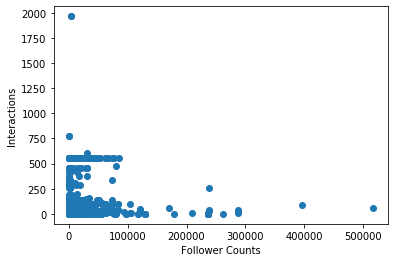

In [12]:
plt.scatter(X,y)
plt.xlabel("Follower Counts")
plt.ylabel("Interactions")

In [11]:
len(X_train)

3631

In [33]:
def insert_impressions(id,username,followers_cout,interaction_count):
    p = 'dataisgreat'

    conn = psycopg2.connect(user = "postgres",
                                  password = f"{p}",
                                  host = "127.0.0.1",
                                  port = "3306",
                                  database = "postgres")

    cursor = conn.cursor()
    
    for i in range(len(id[10:])):
        cursor.execute('INSERT INTO tweet_impressions (id, username, followers, interactions)\
        VALUES (%s,%s,%s,%s);', (id[i],username[i],followers_count[i],interaction_count[i]))
        conn.commit()


In [34]:
insert_impressions(id,username,followers_count,interaction_count)

In [6]:
tweet_list = []
for each in tweets:
    tweet_list.append(each)

In [19]:
print(json.dumps(tweet_list[0]._json,indent=4))

{
    "created_at": "Fri Feb 21 23:59:59 +0000 2020",
    "id": 1231005678443122691,
    "id_str": "1231005678443122691",
    "text": "RT @thewebbix: THIS IS MY JAM! So excited to see this browsing this morning. THIS is how we beat Trump! THIS is how we flip the Senate!\n\nOv\u2026",
    "truncated": false,
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [
            {
                "screen_name": "thewebbix",
                "name": "W\u1d36E\u1d3cB\u1d31B \u270c\ud83c\udffc",
                "id": 32399655,
                "id_str": "32399655",
                "indices": [
                    3,
                    13
                ]
            }
        ],
        "urls": []
    },
    "metadata": {
        "iso_language_code": "en",
        "result_type": "recent"
    },
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_